In [1]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [50]:
import numpy as np
import pandas as pd
import re
import nltk

In [51]:
!pip install pyspellchecker

DEPRECATION: Loading egg at /Users/vishnu/anaconda3/lib/python3.11/site-packages/imageai-3.0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Preprocessing

In [52]:
df = pd.read_csv('/Users/vishnu/Desktop/training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1",names=['target','id','date','flag','user','text'])
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [53]:
df.shape[0]

1600000

In [54]:
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [55]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [64]:
# df.head()  # Shows the first few rows of the DataFrame
# df.shape[0]  # Displays the number of rows in the DataFrame
# df['target'].value_counts().plot.bar()  # Visualizes the distribution of sentiment labels
# Function to classify sentiment based on the 'target' column
def classify_sentiment(target_value):
    if target_value == 0:
        return "Negative Comment"
    elif target_value == 1:
        return "Positive Comment"
    else:
        return "Unknown Sentiment"

# Apply the function to the 'target' column and create a new 'sentiment' column
df['sentiment'] = df['target'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment labels
print(df[['text', 'sentiment']].head(10000))


                                                   text         sentiment
0     @switchfoot http://twitpic.com/2y1zl - Awww, t...  Negative Comment
1     is upset that he can't update his Facebook by ...  Negative Comment
2     @Kenichan I dived many times for the ball. Man...  Negative Comment
3       my whole body feels itchy and like its on fire   Negative Comment
4     @nationwideclass no, it's not behaving at all....  Negative Comment
...                                                 ...               ...
9995                                    Aww that's sad   Negative Comment
9996    stupid dvds stuffing up the good bits in jaws.   Negative Comment
9997  @Dandy_Sephy No. Only close friends and family...  Negative Comment
9998  CRAP! After looking when I last tweeted... WHY...  Negative Comment
9999                          Its Another Rainboot day   Negative Comment

[10000 rows x 2 columns]


In [9]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
# correlation_plot=df.corr()
# print(correlation_plot)
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])
correlation_plot = numeric_df.corr()
print(correlation_plot)


          target        id
target  1.000000 -0.261601
id     -0.261601  1.000000


<Axes: xlabel='target'>

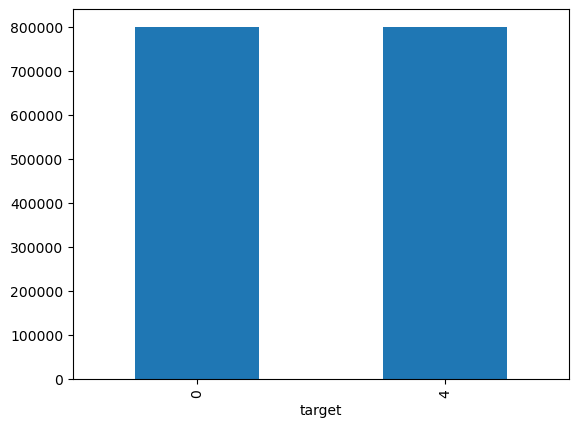

In [12]:
df['target'].value_counts().plot.bar()

In [13]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [14]:
df=df.drop("date",axis=1)
df=df.drop("id",axis=1)
df=df.drop("user",axis=1)
df=df.drop("flag",axis=1)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [15]:
df["text"] = df["text"].str.lower()

In [16]:
df.text = df.text.str.replace("  "," ")

In [17]:
df.text=df.text.str.replace('-'," ")

In [18]:
def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [19]:
for i in range(df.shape[0]):
  df.at[i,'text']=remove_url(df.at[i,'text'])

In [20]:
df["text"]=df["text"].str.replace('\d+','')

In [21]:
import string
Premove = string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans('', '', Premove))
df["text"] = df["text"].apply(lambda text: remove_pun(text))

In [22]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [41]:
df[u'text'] = df[u'text'].astype(str)
df[u'text'] = df[u'text'].apply(lambda x:correct_spellings(x))

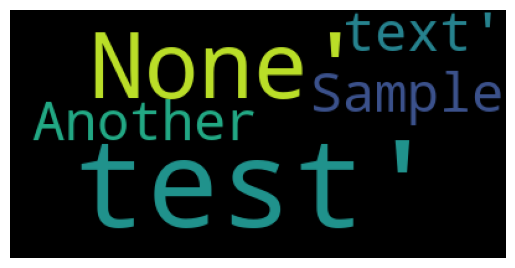

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
real = df['text'].values 
wordcloud = WordCloud().generate(str(real))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
x=df['text']
y=df['target']

In [31]:
x

0          switchfoot    awww thats a bummer you shoulda ...
1          is upset that he cant update his facebook by t...
2          kenichan i dived many times for the ball manag...
3            my whole body feels itchy and like its on fire 
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom   very cool to hear old walt intervi...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

Cross Validation

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [34]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(bnb, x_train, y_train,cv=5, scoring="accuracy")
cv_scores

array([0.78288672, 0.78196875, 0.78207812, 0.78219531, 0.78180469])

In [35]:
cv_scores.mean()

0.78218671875

In [36]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(max_iter=1500)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lgr, x_train, y_train,cv=5, scoring="accuracy")
cv_scores

array([0.80086719, 0.80049219, 0.80094141, 0.80071484, 0.80089062])

In [43]:
cv_scores.mean()

0.80078125

Classifiers

In [44]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.784225


In [45]:
from sklearn.neural_network import MLPClassifier
mlpcl = MLPClassifier(max_iter=300).fit(x_train, y_train)
y_prediction=mlpcl.predict(x_test)
print(accuracy_score(y_test,y_prediction))


/Users/vishnu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.784821875


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1500).fit(x_train, y_train)
y_prediction=lgr.predict(x_test)
print(accuracy_score(y_test,y_prediction))

0.800490625


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(x_train, y_train)
y_predict=svc.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.793615625


In [ ]:
x1=x
y1=y

In [ ]:
x1.shape

(1600000, 720514)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=.2)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train1=scaler.fit_transform(x_train1)
x_test1 = scaler.fit_transform(x_test1)

Dimensionality Reduction Using PCA

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
svd.fit_transform(x_train1)

array([[0.42976985, 0.3440653 ],
       [0.33343001, 0.28897579],
       [0.31503414, 0.27376286],
       ...,
       [0.72333999, 0.62428435],
       [0.06976523, 0.05930229],
       [0.61712784, 0.54451988]])

In [ ]:
svd.explained_variance_ratio_

array([2.11008378e-05, 2.02006585e-05])

In [ ]:
svd.n_components

2

In [ ]:
x_train1.shape

(960000, 720514)

In [ ]:
y_train1.shape

(960000,)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1500)
lgr.fit(x_train1,y_train1)

In [ ]:
lgr.score(x_test1,y_test1)

0.757665625

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train1,y_train1)
y_pred=bnb.predict(x_test1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_pred))

0.7835375


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1500).fit(x_train1, y_train1)
y_predict=svc.predict(x_test1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_predict))

0.693978125


In [67]:
# Function to classify sentiment based on the 'target' column
def classify_sentiment(target_value):
    if target_value == 0:
        return "Negative Comment"
    elif target_value == 4:
        return "Positive Comment"
    else:
        return "Unknown Sentiment"

# Apply the function to the 'target' column and create a new 'sentiment' column
df['sentiment'] = df['target'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment labels
print(df[['text', 'sentiment']].head(10000))


                                                   text         sentiment
0     @switchfoot http://twitpic.com/2y1zl - Awww, t...  Negative Comment
1     is upset that he can't update his Facebook by ...  Negative Comment
2     @Kenichan I dived many times for the ball. Man...  Negative Comment
3       my whole body feels itchy and like its on fire   Negative Comment
4     @nationwideclass no, it's not behaving at all....  Negative Comment
...                                                 ...               ...
9995                                    Aww that's sad   Negative Comment
9996    stupid dvds stuffing up the good bits in jaws.   Negative Comment
9997  @Dandy_Sephy No. Only close friends and family...  Negative Comment
9998  CRAP! After looking when I last tweeted... WHY...  Negative Comment
9999                          Its Another Rainboot day   Negative Comment

[10000 rows x 2 columns]
